In [5]:
%help

The following SysML v2 magic commands are available.
For help on a specific command, use "%help <COMMAND>" or "%<cmd> -h".

%eval		Evaluate a given expression.
%export		Save a file of the JSON representation of the abstract syntax tree rooted in the named element.
%help		Get a list of available commands or help on a specific command
%list		List loaded library packages or the results of a given query
%show		Print the abstract syntax tree rooted in a named element
%publish	Publish to the repository the modele elements rooted in a named element
%view		Render the view specified by the named view usage
%viz		Visualize the name model elements


In [3]:
%help %viz

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

In [11]:
package 'Port Example' {
	
	attribute def Temp;
	
	part def Fuel;
	
	port def FuelOutPort {
		attribute temperature : Temp;
		out item fuelSupply : Fuel;
		in item fuelReturn : Fuel;
	}
	
	port def FuelInPort {
		attribute temperature : Temp;
		in item fuelSupply : Fuel;
		out item fuelReturn : Fuel;
	}
	
	part def FuelTankAssembly {
		port fuelTankPort : FuelOutPort;
	}
	
	part def Engine {
		port engineFuelPort : FuelInPort;
	}
}

Package Port Example (417bc90f-0deb-4b3d-add7-76b0bfd2abd7)


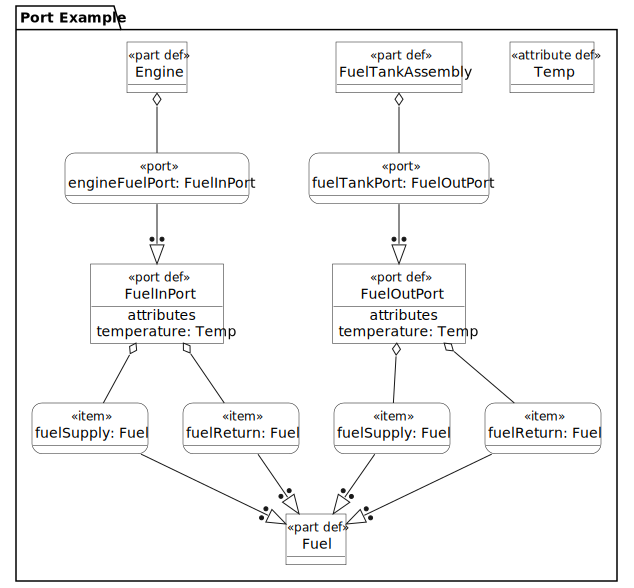

In [26]:
%viz "Port Example"

In [13]:
package 'Binding Connectors Example-1' {
	private import 'Port Example'::*;
	
	part def Vehicle;
	part def FuelPump;
	part def FuelTank;
	
	part vehicle : Vehicle {	
		part tank : FuelTankAssembly {
			port redefines fuelTankPort {
				out item redefines fuelSupply;
				in item redefines fuelReturn;
			}
			
			bind fuelTankPort.fuelSupply = pump.pumpOut;
			bind fuelTankPort.fuelReturn = tank.fuelIn;
			
			part pump : FuelPump {
				out item pumpOut : Fuel;
				in item pumpIn : Fuel;
			}
			
			part tank : FuelTank {
				out item fuelOut : Fuel;
				in item fuelIn : Fuel;
			}
		}
	} 
}

Package Binding Connectors Example-1 (f4496dbb-3f93-47e1-aba9-82f1445ef680)


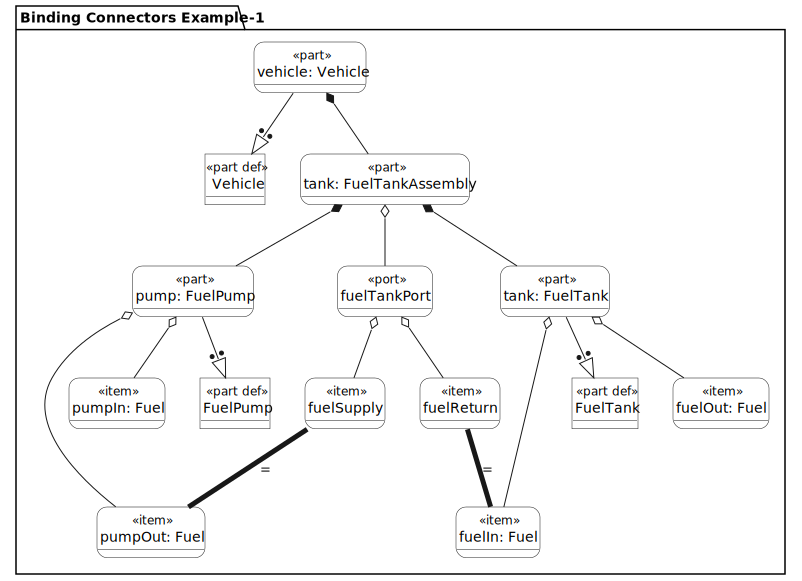

In [24]:
%viz "Binding Connectors Example-1"

In [22]:
package Connections_Example {
	
	part def WheelHubAssembly;
	part def WheelAssembly;
	part def Tire;
	part def TireBead;
	part def Wheel;
	part def TireMountingRim;
	part def LugBoltMountingHole;
	part def Hub;
	part def LugBoltThreadableHole;
	part def LugBoltJoint;
	
	connection def PressureSeat {
		end bead : TireBead[1];
		end mountingRim : TireMountingRim[1];
	}
	
	part wheelHubAssembly : WheelHubAssembly {
		
		part wheel : WheelAssembly[1] {
			part t : Tire[1] {
				part bead : TireBead[2];			
			}
			part w: Wheel[1] {
				part rim : TireMountingRim[2];
				part mountingHoles : LugBoltMountingHole[5];
			}						
			connection : PressureSeat 
				connect bead references t.bead 
				to mountingRim references w.rim;		
		}
		
		part lugBoltJoints : LugBoltJoint[0..5];
		part hub : Hub[1] {
			part h : LugBoltThreadableHole[5];
		}
		connect [0..1] lugBoltJoints to [1] wheel.w.mountingHoles;
		connect [0..1] lugBoltJoints to [1] hub.h;
	}
	
}

Package Connections_Example (011292ff-fa93-489f-a4c0-89e4b6917bf2)


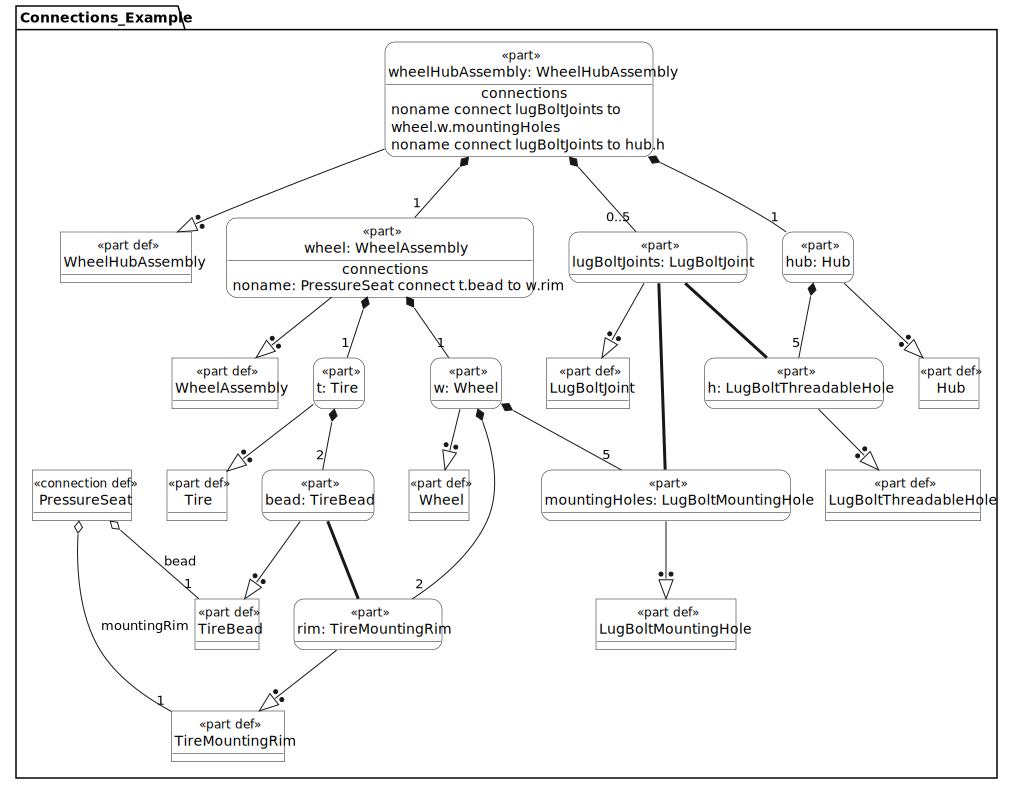

In [24]:
%viz Connections_Example

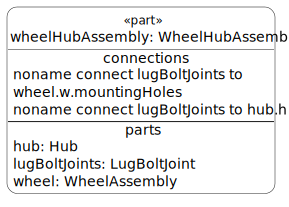

In [34]:
%viz --style=COMPMOST --style=SHOWINHERITED Connections_Example::wheelHubAssembly